In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)

In [3]:
%cd ~/cdv

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
df = pd.read_feather('precomputed/mp2022/energy_data.feather')
df

,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,81,82,83,energy,total_energy
0,0.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1230.566284,-285491.377930
1,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-65.038765,-1040.620239
2,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-53.133846,-743.873848
3,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-47.051189,-564.614273
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-51.042419,-561.466614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.498861,-81.995445
4294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.298337,-14.596674
4295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.867047,-13.734094
4296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.225567,-24.451134


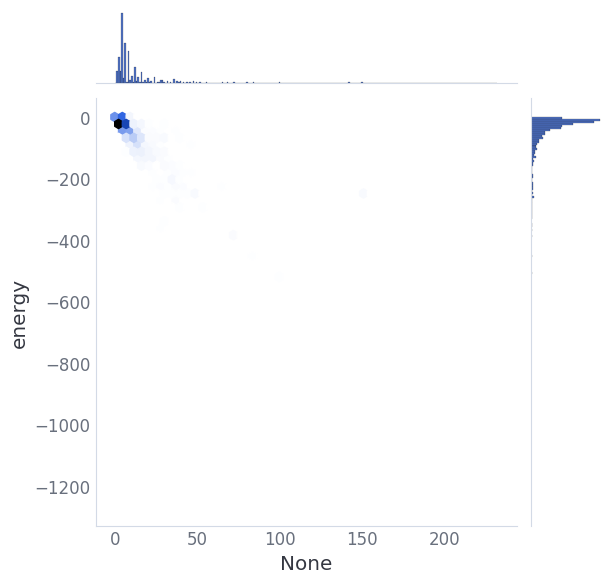

In [12]:
sns.jointplot(x=df.iloc[:, :-2].sum(axis=1), y=df['energy'], kind='hex')

In [3]:
from pymatgen.core import Element
df = pd.read_feather('precomputed/mptrj/summary.feather')
for el in Element:
    if el.symbol in df.columns:
        df[el.symbol] = df[el.symbol].fillna(0).astype(np.uint64)

df

,split,batch_i,stack_i,graph_i,dataset_id,a,b,c,alpha,beta,...,Ir,Pr,Pu,Sc,Xe,Pm,Kr,Ac,Ar,Ne
0,train,0,0,0,-642239162,13.412870,13.412871,20.800194,90.000008,89.999985,...,0,0,0,0,0,0,0,0,0,0
1,train,0,0,1,-111778177,12.720054,12.482335,12.525339,89.998451,89.817131,...,0,0,0,0,0,0,0,0,0,0
2,train,0,0,2,314590316,6.792645,11.650475,11.650475,72.475929,75.461601,...,0,0,0,0,0,0,0,0,0,0
3,train,0,0,3,-116518174,10.875527,7.766849,6.773076,97.901054,96.729279,...,0,0,0,0,0,0,0,0,0,0
4,train,0,0,4,565281819,8.632473,8.635082,8.633600,90.000824,90.001640,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580948,valid,180,2,250,571661308,5.972575,5.923607,7.215285,66.018364,64.755096,...,0,0,0,0,0,0,0,0,0,0
1580949,valid,180,2,251,588390304,4.190520,5.297318,5.747711,93.103233,111.379158,...,0,0,0,0,0,0,0,0,0,0
1580950,valid,180,2,252,153811002,3.785851,3.785851,6.537476,90.000000,90.000000,...,0,0,0,0,0,0,0,0,0,0
1580951,valid,180,2,253,-1682155475,6.697867,6.697867,6.697867,138.331421,138.331421,...,0,0,0,0,0,0,0,0,0,0


In [18]:
elems = sorted(set([el.symbol for el in Element if el.symbol in df.columns]))


elem_counts = df[elems + ['split']].groupby('split', observed=False).sum()
elem_counts

,Ac,Ag,Al,Ar,As,Au,B,Ba,Be,Bi,...,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
split,,,,,,,,,,,,,,,,,,,,,
test,145,14171,44380,12,21941,5576,50811,28343,5371,22266,...,9572,4131,9049,36387,14746,1430,11998,8226,34101,11421
train,2828,173546,511593,7,230197,76560,563664,312662,60257,241034,...,112451,49603,92892,410235,169530,10557,145081,87459,301745,144995
valid,239,17644,51414,0,22255,6151,59470,36320,5860,26530,...,9629,5224,8665,37422,14984,694,12717,7966,33814,13841


In [28]:
elem_counts.iloc[1, :].sort_values()

Ne           7
Ar           7
He         330
Kr        1050
Pa        2620
        ...   
P      1080712
S      1382371
F      1552572
H      2574903
O     15354925
Name: train, Length: 89, dtype: uint64

<Axes: ylabel='split'>

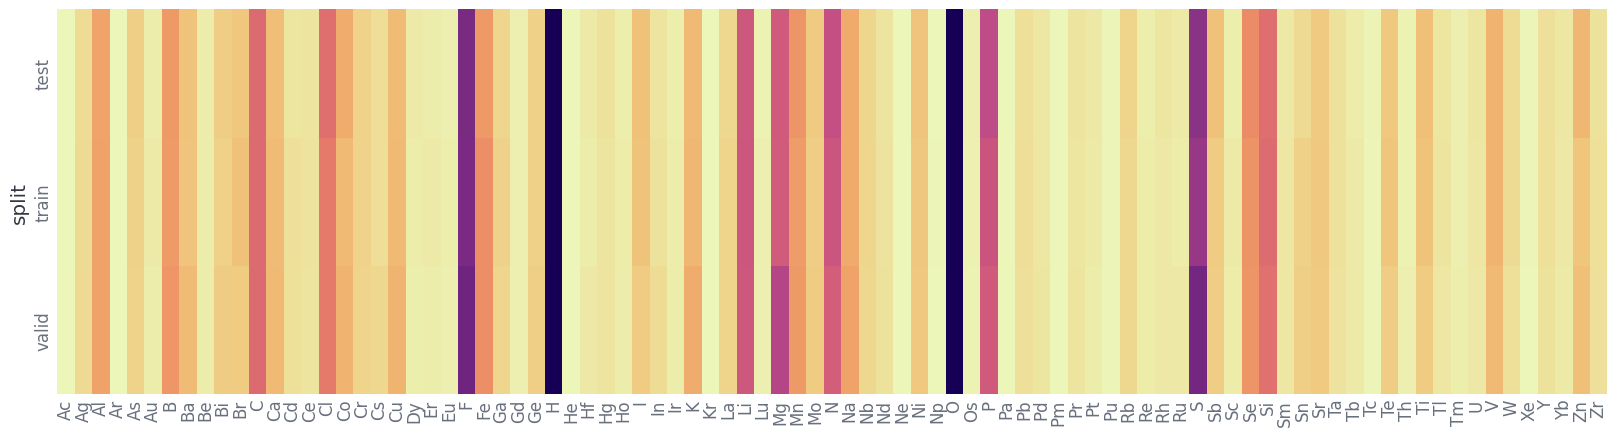

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(elem_counts / elem_counts.values.sum(axis=1).reshape(-1, 1), cbar=None, robust=True, cmap='rho_heatmap')

<Axes: >

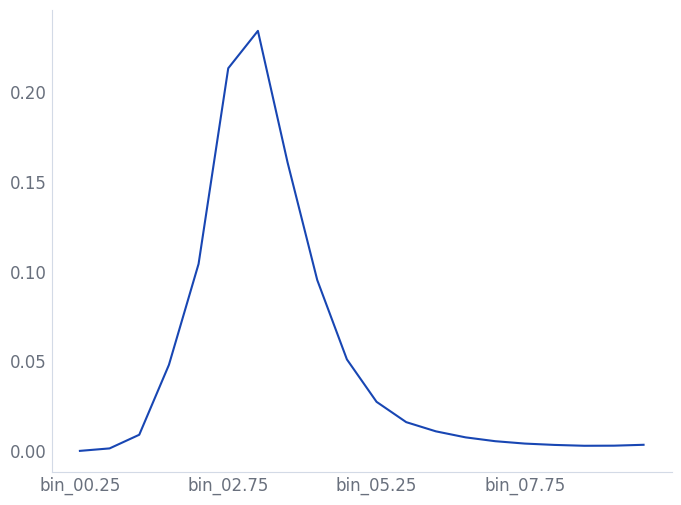

In [12]:
bins = sorted([c for c in df.columns if c.startswith('bin_')])
normed = df[bins] / df[bins].sum(axis=1).values.reshape(-1, 1)

normed.mean(axis=0).plot()

<Axes: xlabel='e_form', ylabel='Density'>

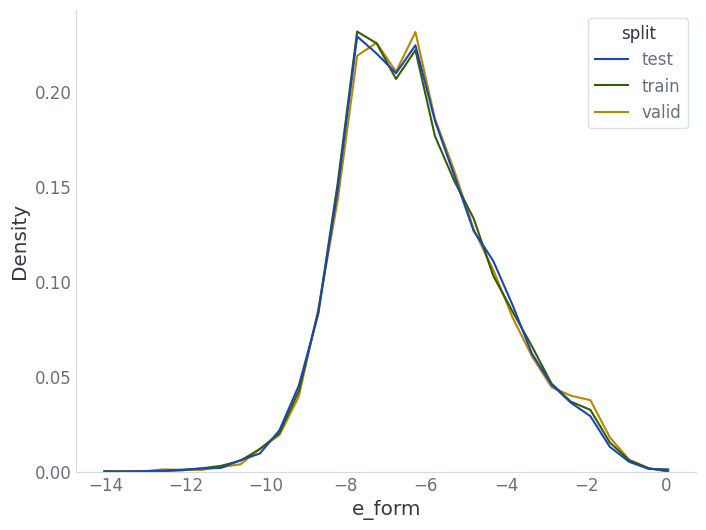

In [38]:
sns.histplot(df, x='e_form', hue='split', bins=30, fill=False, element='poly', stat='density', common_norm=False)

In [53]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)

Xs = {}
ys = {}
for split in ('train', 'valid'):
    df_split = df.query('split == @split')
    Xs[split] = df_split[elems] / df_split['n_nodes'].values.reshape(-1, 1)
    ys[split] = df_split.eval('e_form')

reg.fit(Xs['train'], ys['train'])
reg.score(Xs['valid'], ys['valid'])

0.8533918044471257

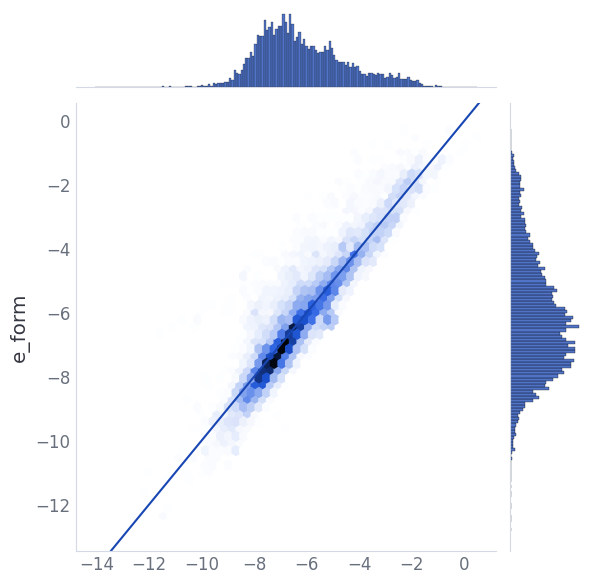

In [56]:
sns.jointplot(x=reg.predict(Xs['valid']), y=ys['valid'], kind='hex')
plt.axline((-6, -6), slope=1)

In [57]:
reg.coef_

array([ -4.26777274,  -1.8055826 ,  -4.38814912,  -0.06364918,
        -4.56881103,  -2.75781801,  -7.52020707,  -3.91605925,
        -3.55081287,  -3.33977797,  -3.15415019,  -8.27033004,
        -3.70189966,  -0.36065918,  -7.46293662,  -3.62143152,
        -6.42028582,  -9.5531031 ,  -2.14460073,  -3.31351185,
        -6.49654881,  -6.36289859, -11.80421813,  -5.63462289,
        -7.99856642,  -3.22772749, -16.16213525,  -4.84026004,
        -3.4421226 ,  -0.1792642 , -10.58404644,   0.67427069,
        -6.33673696,  -2.46306482,  -2.60811485,  -8.26549764,
        -1.70504523,   1.9433028 ,  -7.24734845,  -3.14380011,
        -6.45026251,  -1.57294443,  -9.1221332 ,  -9.99015242,
        -7.77832303,  -1.99405829, -10.5471578 ,  -6.71233374,
        -0.03005797,  -5.60702248, -12.78332379,  -8.3201932 ,
        -9.06905443,  -6.31216404, -10.18235588,  -3.18158894,
        -5.08324496,  -5.19634216,  -6.51074665,  -6.05396443,
       -14.2754064 ,  -1.57747552, -10.59381545,  -7.03

In [65]:
import e3nn_jax as e3nn

e3nn.spherical_harmonics('0e + 1e + 2e + 3e', e3nn.normal('1e'), True)

/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/e3nn_jax/_src/basic.py:610: UserWarning: e3nn.normal: the key (random seed) is not provided, use the hash of the irreps as key!
  warnings.warn(


1x0e+1x1e+1x2e+1x3e
[ 1.         -1.599961    0.55842495 -0.3581708   0.73981637 -1.1534495
 -0.76938796 -0.25821376 -1.5695838   1.4008093   0.6310694   0.7187837
 -1.0578449   0.16090849 -1.3388679   1.0887327 ]

In [80]:
e3nn.tensor_product('0e + 1e + 2e', '0e + 1e + 2e')

3x0e+6x1e+6x2e+3x3e+1x4e

In [100]:
l_x = 4
l_y = 8
a = np.arange(l_x + 1).reshape(-1, 1)
b = np.arange(l_y + 1).reshape(1, -1)

l = np.arange(l_x + l_y + 1).reshape(-1, 1, 1)

lo = np.abs(a - b)
hi = a + b

allowed = ((lo <= l) & (l <= hi)).astype(int)

allowed[5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [101]:
np.sum(allowed, axis=(1, 2))

array([ 5, 13, 19, 23, 25, 24, 22, 19, 15, 10,  6,  3,  1])